In [1]:
import os
import matplotlib.pyplot as plt
import pandas
import numpy
import matplotlib
import pandas as pd
from matplotlib.axis import Axis
from matplotlib.figure import Figure
from matplotlib.patches import Rectangle

from env import *
from visualiser import *
from main import *
from constants import *
# import xlsxwriter
import csv
%matplotlib inline

pygame 2.1.3.dev8 (SDL 2.0.22, Python 3.11.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
SENSOR_RANGE = 20

n=range(2, 11)
ENV_SIZE=1000
XL=500
YL=150

GOAL_X=500
GOAL_Y=850
MAX_T=100000

In [3]:
def calcDF(n):
    return [(SENSOR_RANGE+ROBOT_RADIUS)*(i-(n-1)/2) for i in range(n)] * n, [(SENSOR_RANGE+ROBOT_RADIUS)*(i-(n-1)/2) for i in range(n)for _ in range(n) ]

In [4]:
def plot_trajectory(env, fig:Figure = None, ax:Axis=None):

	if fig is None and ax is None:
		fig=matplotlib.pyplot.figure(figsize=(16, 16))
	if ax is None:
		ax=fig.add_subplot()
	# ax.invert_yaxis()

	posei=env.pose_history[:, env.N, :]
	for i in range(env.N):
					posei=env.pose_history[:, i, :]
					deadi=env.dead_history[:, i]
					posei=posei[~deadi]
					ax.plot(posei[:,0], posei[:, 1], label='Agent '+str(i), color='aqua')
	ax.plot(posei[:env.t-1,0], posei[:env.t-1, 1], linestyle='dashdot',  label='Virtual Leader', color='blue', zorder=3)
	line=[None]*env.N

	for wall in env.walls:
					ax.add_patch(Rectangle((wall.from_x, wall.from_y), wall.length_x, wall.length_y, color='black'))
	ax.scatter(env.xL0, env.yL0, marker='*', zorder=3, color='blue', s=150)
	ax.scatter(env.xG, env.yG, marker='*', zorder=3, color='blue', s=150)
	for agent in env.agents:
					ax.scatter(env.xL0+agent.dx, env.yL0+agent.dy, color='limegreen')
					ax.scatter(env.pose_history[env.t-1, agent.id, 0], env.pose_history[env.t-1, agent.id, 1], color='red' if agent.is_dead else 'limegreen')
	return fig


In [5]:
directory = '../run_exp_102'
if not os.path.exists(directory):
	os.makedirs(directory)
df=pandas.DataFrame(columns=['id','sensor_range' , 'n1', 'n2', 'n3', 'N', 'lived_agents', 'leader_goal_distance', 't', 'w1', 'w2', 'w3' ])
df.set_index('id', inplace=True)

In [6]:
n=10

In [7]:
DX,DY=calcDF(n)
env = Env(
        width=ENV_SIZE, height=ENV_SIZE, goal_x=GOAL_X, goal_y=GOAL_Y, N=n ** 2,
        desired_X=DX, desired_Y=DY, sensor_range=SENSOR_RANGE, leader_x=XL, leader_y=YL, robot_radius=ROBOT_RADIUS,
        sensor_detection_count=SENSOR_DETECTION_COUNT, buffer_size=10000
    )
env.addObstacle(400, 400, 600, 600)


In [8]:
episode_gui(env, 12.3, 1, 1)

In [9]:
# alive_agent_count(env)

In [8]:
n_max=20
if not os.path.exists(directory):
	os.makedirs(directory)
df=pandas.DataFrame(columns=['id','sensor_range' , 'n1', 'n2', 'n3', 'N', 'lived_agents', 'leader_goal_distance', 't', 'w1', 'w2', 'w3' ])
df.set_index('id', inplace=True)

In [9]:
# df[df['t']==50000]

In [10]:
# file_name=os.path.join(directory, 'var.npz')
n_max=20
directory = '../run_exp_132'
if not os.path.exists(directory):
	os.makedirs(directory)

csv_file_name = os.path.join(directory, 'report.csv')
if os.path.exists(csv_file_name):
	df = pandas.read_csv(csv_file_name, header=None,
						 names=['id', 'sensor_range', 'n1', 'n2', 'n3', 'N', 'lived_agents', 'leader_goal_distance',
								't', 'w1', 'w2', 'w3'])
	run, _, n01, n02, n03, n00, _, _, _, _, _, _ = list(df.iloc[-1])
	# cur_state=numpy.load(file_name)
	# n03=int(n03)-1
	# n00=int(n00)
	# n01=int(n01)
	n03 = int(n03) - 1
	df.set_index('id', inplace=True)
else:
	# killed_list=[]
	# n01=n_max
	n03 = n_max
	# n03 = n_max
	run = 0
# n00=2

fig = plt.Figure()
ax = fig.add_subplot()

n = 10
w1 = 1
w2 = 1
n1 = 10
n2 = 10
for n3 in range(n03, -1, -1):
	run = run + 1
	w3 = n3 / 10
	print('w3=', w3)
	print('run=' + str(run))
	ep_file = os.path.join(directory, str(run) + '_' + str(n) + '_' + str(w1) + '_' + str(w2) + '_' + str(w3))
	#'id','sensor_range' , 'w1', 'w2', 'w3', 'N', 'lived_agents', 1'leader_goal_distance', 't', 'v_mean'
	env.episode(w1, w2, w3)
	# env.save_episode(ep_file)

	row = [SENSOR_RANGE, n1, n2, n3, n, alive_agent_count(env), leader_goal_distance(env), env.t, w1, w2, w3]
	df.loc[run] = row
	print(row)
	# env.episode(w1/10, w2/10, w3/10, killed_list)
	# env.save_episode(ep_file+'a')

	# numpy.savez(file_name, run=run, n1=n1, n2=n2, n3=n3, n=n)

	plot_trajectory(env, ax=ax)
	plt_file = ep_file + '.jpg'
	fig.savefig(plt_file)
	ax.clear()
	# df.iloc[-1].to_csv(csv, mode='a', index=False, header=False)
	# run=run+1
	with open(csv_file_name, 'a', newline='') as f:
		writer = csv.writer(f)
		writer.writerow([run] + row)

# run=run+1
# df.to_csv()

n03 = n_max

w3= 0.1
run=20.0


KeyboardInterrupt: 

In [11]:
df_=df[df['lived_agents']>0]

In [13]:
df_=df_[df_['leader_goal_distance']>0]
n1_re=list(df_['n1'])
n1_re=[
	# 76,
 # 123,
 # 145,
 # 147,
 # 150,
 # 154,
 # 156,
 # 158,
 160,
 163,
 171,
 175,
 181,
 182,
 185,
 186,
 187,
 189,
 190,
 191,
 192,
 196,
 197,
 199]

In [12]:
directory = '../run_exp_112'
if not os.path.exists(directory):
	os.makedirs(directory)

csv_file_name = os.path.join(directory, 'report.csv')
if os.path.exists(csv_file_name):
	df = pandas.read_csv(csv_file_name, header=None,
						 names=['id', 'sensor_range', 'n1', 'n2', 'n3', 'N', 'lived_agents', 'leader_goal_distance',
								't', 'w1', 'w2', 'w3'])
	run, _, n01, n02, n03, n00, _, _, _, _, _, _ = list(df.iloc[-1])
	# cur_state=numpy.load(file_name)
	# n03=int(n03)-1
	# n00=int(n00)
	# n01=int(n01)
	n01 = int(n01) + 1
	df.set_index('id', inplace=True)


In [13]:
# df=df[df['w1']<=10]
df.loc[df['leader_goal_distance']>1, 't']=None

df[df['leader_goal_distance']>1]
df=df.drop([77.0])

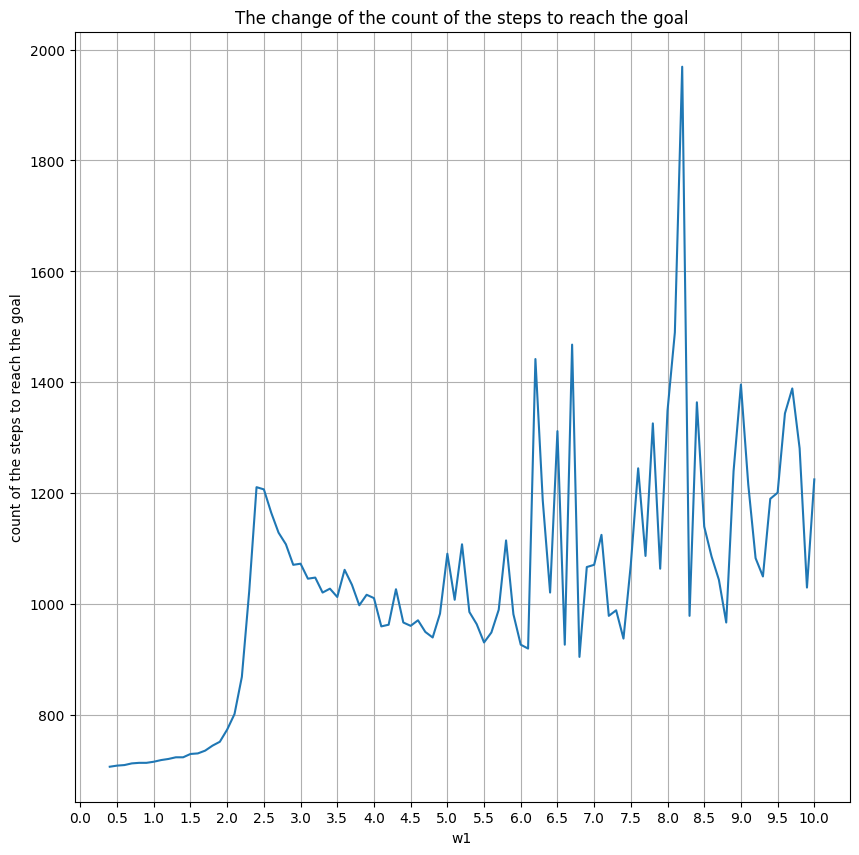

In [14]:
df100=df[df['w1']<=10]
df100=df100.sort_values('w1')
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the data on the axis
# ax.plot(df100['w1'], df100['lived_agents'])
ax.plot(df100['w1'], df100['t'])

# Add labels and title
ax.set_xlabel('w1')
ax.set_ylabel("count of the steps to reach the goal")
ax.set_title('The change of the count of the steps to reach the goal')
ax.grid(True)
# ax.set_yticks(range(0,101, 2))
ax.set_xticks(numpy.array([*range(0, 101, 5)])/10)

In [17]:
df.t.max()

2786.0

In [ ]:
# file_name=os.path.join(directory, 'var.npz')
n_max=200
directory = '../run_exp_1121'
if not os.path.exists(directory):
	os.makedirs(directory)

csv_file_name = os.path.join(directory, 'report.csv')
if os.path.exists(csv_file_name):
	df = pandas.read_csv(csv_file_name, header=None,
						 names=['id', 'sensor_range', 'n1', 'n2', 'n3', 'N', 'lived_agents', 'leader_goal_distance',
								't', 'w1', 'w2', 'w3'])
	run, _, n01, n02, n03, n00, _, _, _, _, _, _ = list(df.iloc[-1])
	# cur_state=numpy.load(file_name)
	# n03=int(n03)-1
	# n00=int(n00)
	# n01=int(n01)
	n01 = int(n01) + 1
	df.set_index('id', inplace=True)
else:
	# killed_list=[]
	# n01=n_max
	n01 = 0
	# n03 = n_max
	run = 0
# n00=2

fig = plt.Figure()
ax = fig.add_subplot()

n = 10
w2 = 1
w3 = 1
n2 = 10
n3 = 10
for n1 in range(n01, n_max):
	run = run + 1
	w1 = n1 / 10
	print('w1=', w1)
	print('run=' + str(run))
	ep_file = os.path.join(directory, str(run) + '_' + str(n) + '_' + str(w1) + '_' + str(w2) + '_' + str(w3))
	#'id','sensor_range' , 'w1', 'w2', 'w3', 'N', 'lived_agents', 'leader_goal_distance', 't', 'v_mean'
	env.episode(w1, w2, w3)
	# env.save_episode(ep_file)

	row = [SENSOR_RANGE, n1, n2, n3, n, alive_agent_count(env), leader_goal_distance(env), env.t, w1, w2, w3]
	df.loc[run] = row
	print(row)
	# env.episode(w1/10, w2/10, w3/10, killed_list)
	# env.save_episode(ep_file+'a')

	# numpy.savez(file_name, run=run, n1=n1, n2=n2, n3=n3, n=n)

	plot_trajectory(env, ax=ax)
	plt_file = ep_file + '.jpg'
	fig.savefig(plt_file)
	ax.clear()
	# df.iloc[-1].to_csv(csv, mode='a', index=False, header=False)
	# run=run+1
	with open(csv_file_name, 'a', newline='') as f:
		writer = csv.writer(f)
		writer.writerow([run] + row)

# run=run+1
# df.to_csv()

n01 = n_max

w1= 0.0
run=1
[20, 0, 10, 10, 10, 0, 359.0, 343, 0.0, 1, 1]
w1= 0.1
run=2
[20, 1, 10, 10, 10, 0, 358.34102959536256, 344, 0.1, 1, 1]
w1= 0.2
run=3
[20, 2, 10, 10, 10, 0, 358.8577285035758, 344, 0.2, 1, 1]
w1= 0.3
run=4
[20, 3, 10, 10, 10, 0, 358.7459463690784, 345, 0.3, 1, 1]
w1= 0.4
run=5
[20, 4, 10, 10, 10, 1, 0.39830722651330774, 706, 0.4, 1, 1]
w1= 0.5
run=6
[20, 5, 10, 10, 10, 1, 0.6918678210171101, 708, 0.5, 1, 1]
w1= 0.6
run=7
[20, 6, 10, 10, 10, 2, 0.7943218288190224, 709, 0.6, 1, 1]
w1= 0.7
run=8
[20, 7, 10, 10, 10, 2, 0.6902984658994046, 712, 0.7, 1, 1]
w1= 0.8
run=9
[20, 8, 10, 10, 10, 3, 0.6189940223109318, 713, 0.8, 1, 1]
w1= 0.9
run=10
[20, 9, 10, 10, 10, 3, 0.9583311100281606, 713, 0.9, 1, 1]
w1= 1.0
run=11
[20, 10, 10, 10, 10, 4, 0.5059637286881423, 715, 1.0, 1, 1]
w1= 1.1
run=12
[20, 11, 10, 10, 10, 4, 0.749281581669261, 718, 1.1, 1, 1]
w1= 1.2
run=13
[20, 12, 10, 10, 10, 5, 0.38041835018190523, 720, 1.2, 1, 1]
w1= 1.3
run=14
[20, 13, 10, 10, 10, 6, 0.6494507584861754,

In [ ]:
1# file_name=os.path.join(directory, 'var.npz')
n_max = 50
directory = '../run_exp_122'
if not os.path.exists(directory):
	os.makedirs(directory)

csv_file_name = os.path.join(directory, 'report.csv')
if os.path.exists(csv_file_name):
	df = pandas.read_csv(csv_file_name, header=None,
						 names=['id', 'sensor_range', 'n1', 'n2', 'n3', 'N', 'lived_agents', 'leader_goal_distance',
								't', 'w1', 'w2', 'w3'])
	run, _, n01, n02, n03, n00, _, _, _, _, _, _ = list(df.iloc[-1])
	# cur_state=numpy.load(file_name)
	# n03=int(n03)-1
	# n00=int(n00)
	# n01=int(n01)
	n02 = int(n02) - 1
	df.set_index('id', inplace=True)
else:
	# killed_list=[]
	# n01=n_max
	n02 = n_max
	# n03 = n_max
	run = 0
# n00=2

fig = plt.Figure()
ax = fig.add_subplot()

n = 10
w1 = 5
w3 = 0.5
n1 = 50
n3 = 5
for n2 in range(n02, -1, -1):
	run = run + 1
	w2 = n2 / 10
	print('w3=', w3)
	print('run=' + str(run))
	ep_file = os.path.join(directory, str(run) + '_' + str(n) + '_' + str(w1) + '_' + str(w2) + '_' + str(w3))
	#'id','sensor_range' , 'w1', 'w2', 'w3', 'N', 'lived_agents', 'leader_goal_distance', 't', 'v_mean'
	env.episode(w1, w2, w3)
	# env.save_episode(ep_file)

	row = [SENSOR_RANGE, n1, n2, n3, n, alive_agent_count(env), leader_goal_distance(env), env.t, w1, w2, w3]
	df.loc[run] = row
	print(row)
	# env.episode(w1/10, w2/10, w3/10, killed_list)
	# env.save_episode(ep_file+'a')

	# numpy.savez(file_name, run=run, n1=n1, n2=n2, n3=n3, n=n)

	plot_trajectory(env, ax=ax)
	plt_file = ep_file + '.jpg'
	fig.savefig(plt_file)
	ax.clear()
	# df.iloc[-1].to_csv(csv, mode='a', index=False, header=False)
	# run=run+1
	with open(csv_file_name, 'a', newline='') as f:
		writer = csv.writer(f)
		writer.writerow([run] + row)

# run=run+1
# df.to_csv()

n02 = n_max